## 1. Primeiros passos

- Importando pandas e matplotlib

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

- Lendo o arquivo csv googleplaystore.csv e o transformando em um DataFrame

In [238]:
dados = pd.read_csv("C:/Users/arthu/OneDrive/Desktop/Programa de Bolsas/PB-Compass/Sprint 3/Desafio/googleplaystore.csv")

dados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Removendo Duplicatas

- Descobrindo qual coluna usar para remover as duplicatas

In [239]:
achar_duplicadas = dados.duplicated(keep=False, subset=["App"])
linhas_duplicadas = dados[achar_duplicadas]
duplicadas_ordenadas = linhas_duplicadas.sort_values(by=["App", "Reviews"], ascending=[True, False])

duplicadas_ordenadas

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


- Percebi que a coluna "App" é ideal para remover duplicatas, já que cada nome corresponde a apenas um aplicativo. No entanto, preciso manter a linha mais recente de cada app, e para isso escolhi remover os dados da seguinte maneira:

In [240]:
dados_filtrados = dados.drop_duplicates(keep='first', subset=["App"])

dados_filtrados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2. Criação do gráfico dos top 5 apps por número de instalação


- Mudando tipo de dados da coluna Installs de str para int e descobrindo qual os Apps com mais Installs

In [241]:
# Mudando tipo de Dados
dados_filtrados.loc[:, "Installs"] = dados_filtrados["Installs"].astype(str)

dados_filtrados.loc[:, "Installs"] = dados_filtrados["Installs"].str.replace(",", "").str.replace("+", "")

dados_filtrados.loc[:, "Installs"] = pd.to_numeric(dados_filtrados["Installs"], errors='coerce', downcast='integer').fillna(0)

#Filtrando Apps com mais Installs
dados_filtrados.sort_values("Installs", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000.0,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000.0,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000.0,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000.0,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000.0,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0.0,Free,0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0.0,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
9917,Eu Sou Rico,FINANCE,NaN,0,1.4M,0.0,Paid,$394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0.0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


- Criação do gráfico propriamente dita

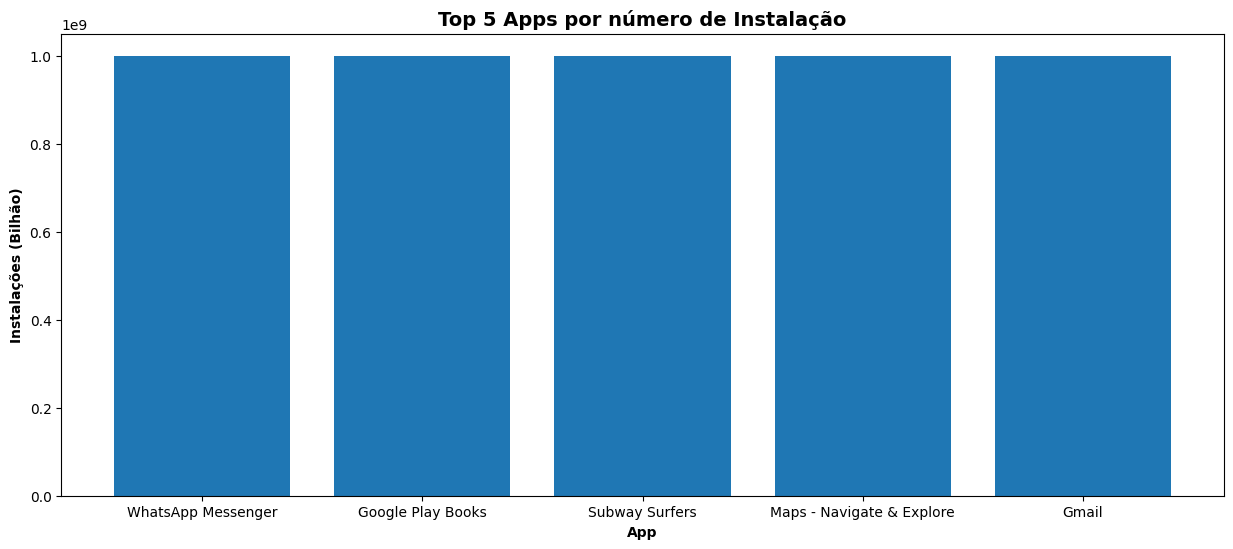

In [288]:
top_Installs = dados_filtrados.sort_values("Installs", ascending=False).head(5)
cores = ["green","blue", "red", "orange", "yellow"]

##Criar o gráfico
plt.figure(figsize=(15, 6))
plt.bar(top_Installs["App"], top_Installs["Installs"])

#Legenda do Gráfico

plt.title("Top 5 Apps por número de Instalação",fontsize = 14 ,fontweight ="bold")
plt.xlabel("App", fontweight ="bold")
plt.ylabel("Instalações (Bilhão)", fontweight ="bold")

plt.show()



## 3. Criação do gráfico mostrando as categorias de apps existentes de acordo com a frequência que eles aparecem


- Analisando o DataFrame, percebi que tem uma linha na qual a versão do App está na coluna de categorias. Procurando a linha e resolvendo o problema:

In [243]:
dados_filtrados.sort_values("Category")

#criando uma nova linha e inserindo as informações corretas
dados_filtrados.loc[len(dados_filtrados)] = ["Life Made WI-Fi Touchscreen Photo Frame", "LIFESTYLE", 1.9, 0, "3.0M", 1000, "Free", 0, "Everyone", "Lifestyle", "February 11, 2018", "1.0.19", "4.0 and up"]
#removendo a linha original
dados_filtrados.drop(10472, inplace=True)

dados_filtrados.loc[dados_filtrados["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

C:\Users\arthu\AppData\Local\Temp\ipykernel_17484\2068684498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados.drop(10472, inplace=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9660,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,0,3.0M,1000,Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


- Descobrindo o nome e a frequência das categorias

In [244]:
frequencia_categorias = dados_filtrados["Category"].value_counts()

frequencia_categorias


Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                419
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               370
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

- Fazendo o gráfico

<function matplotlib.pyplot.show(close=None, block=None)>

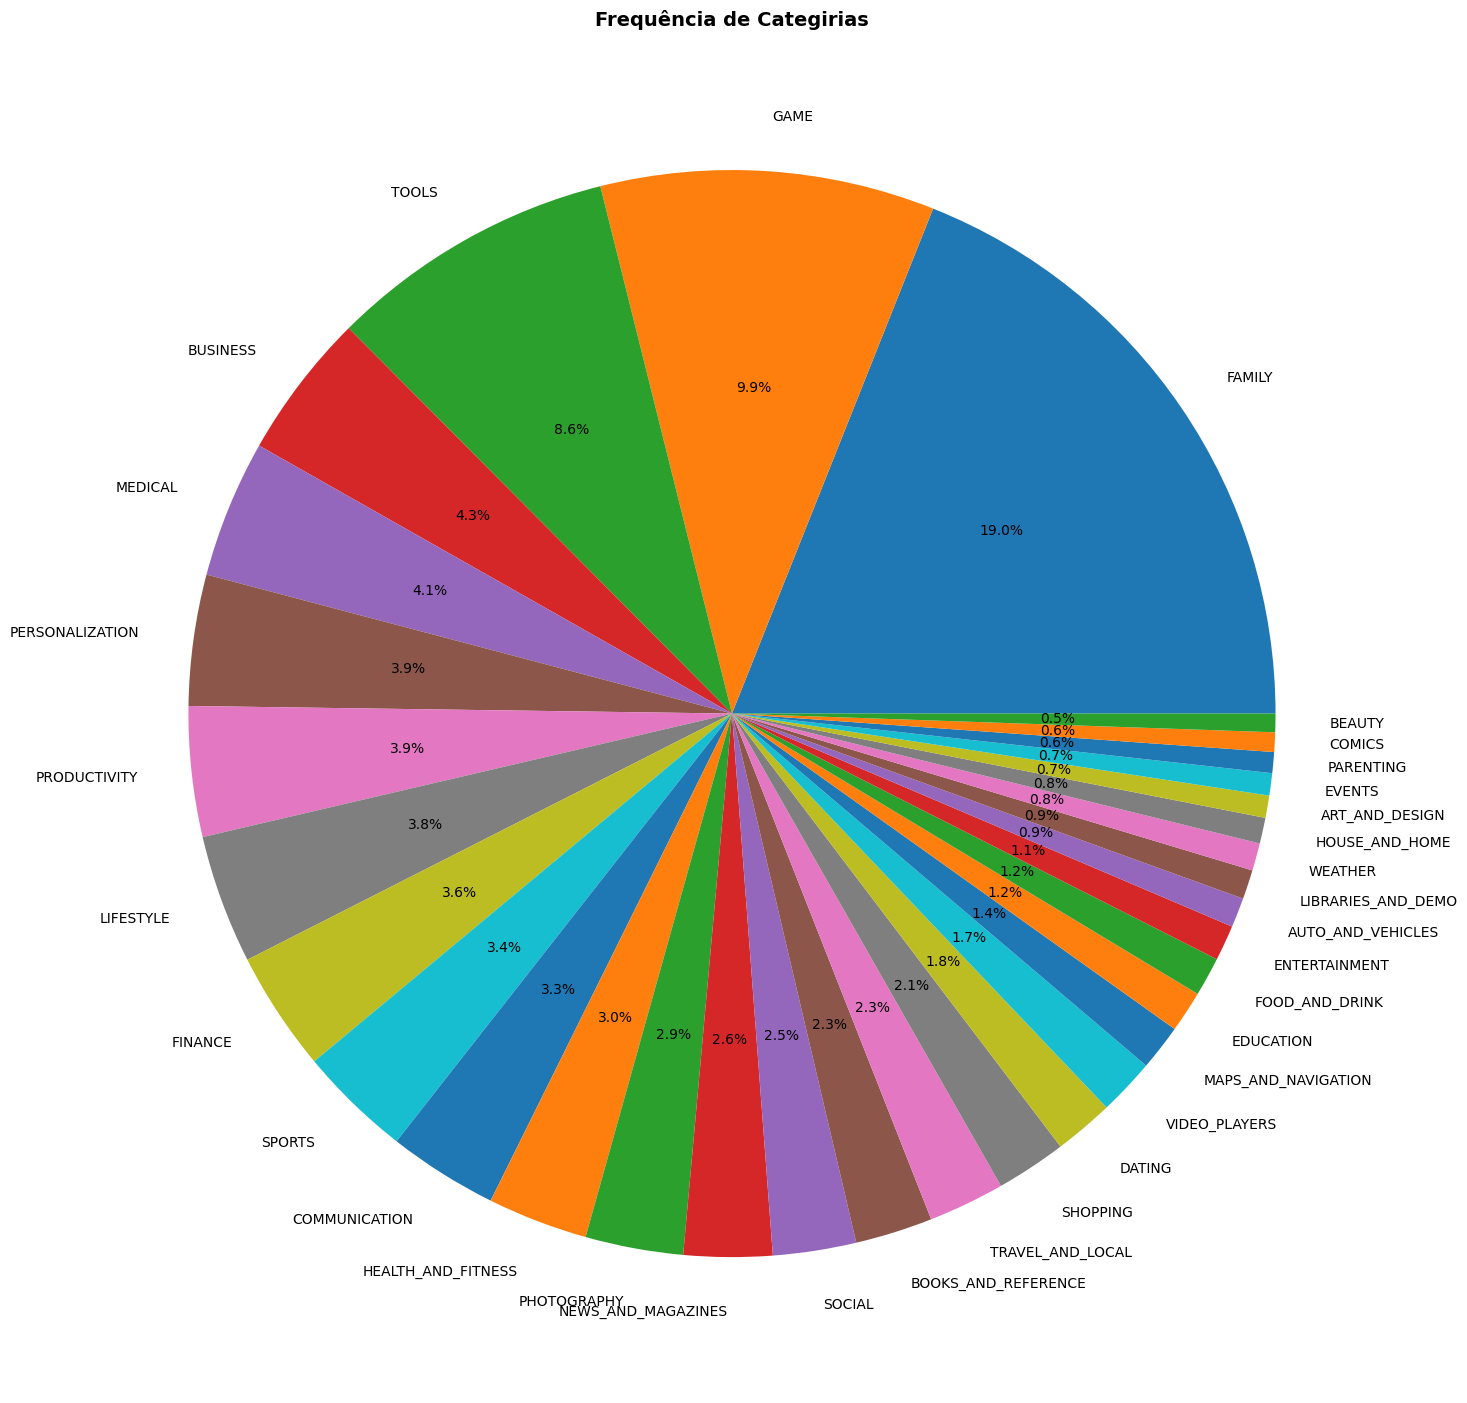

In [245]:
plt.figure(figsize=(15,15))
plt.pie(frequencia_categorias, labels=frequencia_categorias.index, autopct="%1.1f%%")

plt.title("Frequência de Categirias", fontsize = 14 ,fontweight ="bold")

plt.tight_layout()

plt.show

## 4. Mostrando o App mais caro existente no dataset

- Fazendo o tratamente da coluna Price

In [246]:
dados_filtrados.loc[:, "Price"] = dados_filtrados["Price"].str.replace("$", "")

dados_filtrados.loc[:, "Price"] = pd.to_numeric(dados_filtrados["Price"], errors='coerce', downcast='float').fillna(0)

- Descobrindo e mostrando o App mais caro

In [247]:
app_caro = dados_filtrados.sort_values("Price", ascending=False).head(1)
nome_app_caro = app_caro["App"].values

print(f"O App mais caro é o: {nome_app_caro[0]}")


O App mais caro é o: I'm Rich - Trump Edition


## 5. Mostrando quantos Apps são classificados como Mature 17+

- Descobrindo quais Apps possuem a classificação:

In [248]:
dados_filtrados.loc[dados_filtrados["Content Rating"] == "Mature 17+"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,10000.0,Free,0.0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
133,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,8.2M,100000.0,Free,0.0,Mature 17+,Beauty,"March 1, 2017",1.0.2.0,1.6 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,10000.0,Free,0.0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,23M,5000000.0,Free,0.0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
170,Flybook,BOOKS_AND_REFERENCE,3.9,1778,4.9M,500000.0,Free,0.0,Mature 17+,Books & Reference,"October 16, 2014",1.0.3,2.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100.0,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000.0,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10783,Modern Counter Terror Attack – Shooting Game,GAME,4.2,340,72M,50000.0,Free,0.0,Mature 17+,Action,"October 27, 2017",1.0,4.1 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000.0,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


- Contando o Total de Apps

In [249]:
total_Mature17 = len(dados_filtrados.loc[dados_filtrados["Content Rating"] == "Mature 17+"])

print(f"O total de Apps com a Classificação Mature 17+ é de: {total_Mature17}")

O total de Apps com a Classificação Mature 17+ é de: 393


## 6. Mostrando o top 10 apps por número de reviews bem como o respectivo número de reviews 

- Descobrindo o top 10 apps por número de reviews

In [250]:
dados_filtrados.sort_values("Reviews", ascending=False)

TypeError: '<' not supported between instances of 'int' and 'str'

- Dado esse erro, percebi que preciso fazer um tratamento nos dados da coluna Reviews. Fazendo o tratamento:

In [252]:
dados_filtrados.loc[:, "Reviews"] = dados_filtrados["Reviews"].astype(str)

dados_filtrados.loc[:, "Reviews"] = pd.to_numeric(dados_filtrados["Reviews"], errors='coerce', downcast='integer').fillna(0)

- Descobrindo os Apps com mais reviews após o tratamento:

In [253]:
dados_filtrados.sort_values("Reviews", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,100000000.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,BH Bikes GPS Locator,SPORTS,NaN,0,10M,10.0,Free,0.0,Everyone,Sports,"July 19, 2018",1.0,5.0 and up
6880,BV Teknisk App,BUSINESS,NaN,0,2.0M,50.0,Free,0.0,Everyone,Business,"January 15, 2016",4.1.2099,4.0 and up
6153,BG MUSIC PLAYER - MUSIC PLAYER,VIDEO_PLAYERS,NaN,0,8.6M,100.0,Free,0.0,Everyone,Video Players & Editors,"June 26, 2018",1.0,4.1 and up
8154,Wallpapers CZ 75 85,PERSONALIZATION,NaN,0,12M,10.0,Free,0.0,Teen,Personalization,"April 12, 2018",1.0,4.1 and up


- Mostrando os 10 apps com os respectivos números de reviews:


In [254]:
top_reviews_apps = dados_filtrados.sort_values("Reviews", ascending=False).head(10)

print("Os top 10 Apps com maiores números de Reviews são:")
print(top_reviews_apps[["App", "Reviews"]].to_string(index=False))


Os top 10 Apps com maiores números de Reviews são:
                                               App  Reviews
                                          Facebook 78158306
                                WhatsApp Messenger 69119316
                                         Instagram 66577313
          Messenger – Text and Video Chat for Free 56642847
                                    Clash of Clans 44891723
           Clean Master- Space Cleaner & Antivirus 42916526
                                    Subway Surfers 27722264
                                           YouTube 25655305
Security Master - Antivirus, VPN, AppLock, Booster 24900999
                                      Clash Royale 23133508


## 7. Criando mais 2 cálculos sobre o dataset

### 1º Calculo: Top 10 Apps com a última atualização mais recente

- Descobrindo quais são esses apps

In [ ]:
dados_filtrados.sort_values("Last Updated", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6834,Kim Bu Youtuber?,FAMILY,NaN,1000,9.2M,1000.0,Free,0.0,Everyone,Puzzle,"September 9, 2017",1.0,4.0 and up
10393,SnowMobile Parking Adventure,GAME,3.6,1000000,49M,1000000.0,Free,0.0,Everyone,Racing,"September 9, 2016",1.4,2.3 and up
9437,EI国际,FAMILY,4.7,1000,5.2M,1000.0,Free,0.0,Everyone,Education,"September 9, 2016",1.0.4,4.0 and up
6983,Best Friends Dress Up & Makeup,FAMILY,3.7,500000,44M,500000.0,Free,0.0,Everyone,Casual;Pretend Play,"September 9, 2015",1.0.3,4.0.3 and up
7449,Sin City Hero : Crime Simulator of Vegas,GAME,4.1,100000,78M,100000.0,Free,0.0,Teen,Action,"September 8, 2017",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,Q*bert: Rebooted,GAME,4.3,1000000,55M,1000000.0,Free,0.0,Everyone,Arcade,"April 1, 2017",1.1,4.4 and up
7834,CS16Client,GAME,4.3,500000,9.1M,500000.0,Free,0.0,Teen,Action,"April 1, 2017",1.33,1.5 and up
9116,PHARMAGUIDE (DZ),HEALTH_AND_FITNESS,4.1,5000,3.4M,5000.0,Free,0.0,Everyone,Health & Fitness,"April 1, 2016",1.06,1.6 and up
424,DU Browser—Browse fast & fun,COMMUNICATION,4.3,10000000,4.7M,10000000.0,Free,0.0,Everyone,Communication,"April 1, 2016",6.4.0.4,4.0 and up


- Percebi que o filtro não estava sendo aplicado corretamente, então decidi tratar os dados da coluna "Last Updated". Tratando os dados:

In [ ]:
dados_filtrados.loc[:, "Last Updated"] = pd.to_datetime(dados_filtrados["Last Updated"], format='%B %d, %Y', errors='coerce').fillna(0).dt.date

dados_filtrados.sort_values("Last Updated", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,50000000.0,Free,0.0,Teen,Action,2018-08-08,1.1.2,4.1 and up
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,1000000.0,Free,0.0,Everyone,Shopping,2018-08-08,Varies with device,Varies with device
10718,BankNordik,FINANCE,3.9,28,15M,5000.0,Free,0.0,Everyone,Finance,2018-08-08,7.3.2,5.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,50000.0,Free,0.0,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,Freecell CY,GAME,4.0,387,1.1M,50000.0,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000.0,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000.0,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000.0,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up


- Após o tratamento, aplicando o filtro e descobrindo quais são esses Apps e mostrando os dados

In [ ]:
ultimas_atualizacoes = dados_filtrados[["App", "Last Updated"]].sort_values(by="Last Updated", ascending=False).head(10)

print("Top 10 Apps com a última atualização mais recente")
print(ultimas_atualizacoes.to_string(index=False))

Top 10 Apps com a última atualização mais recente
                                               App Last Updated
                           Shoot Hunter-Gun Killer   2018-08-08
                             Lalafo Pulsuz Elanlar   2018-08-08
                                        BankNordik   2018-08-08
                                   Fast Tract Diet   2018-08-08
      Video Downloader For FB: Save FB Videos 2018   2018-08-08
                                           DYPSOET   2018-08-07
Punjab Online - Land Records • EB Bill Pay • RC/DL   2018-08-07
                                      [EF]ShoutBox   2018-08-07
    Emoji keyboard - Cute Emoticons, GIF, Stickers   2018-08-07
                         Justice League Action Run   2018-08-07


### 2º Calculo: Aplicativo com maior Rating e que possua mais de 10000 Reviews

- Descobrindo qual o app:

In [ ]:
app_rating = dados_filtrados.loc[dados_filtrados["Reviews"] > 10000].sort_values("Rating", ascending=False).head(1)

app_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10254,FC Porto,SPORTS,4.9,15883,21M,100000.0,Free,0.0,Everyone,Sports,2018-06-19,2.6.0,4.0.3 and up


- Mostrando o App

In [ ]:
nome_app_rating = app_rating["App"].values

print(f"O aplicativo com maior Rating e que possue mais de 10000 reviews é o: {nome_app_rating[0]}")

O aplicativo com maior Rating e que possue mais de 10000 reviews é o: FC Porto


## 8. Criando outras 2 formas gráficas de exibição dos indicadores utilizados

### 1º Gráfico: gráfico de linha mostrando os top 10 apps por número de reviews

- Criando o gráfico:

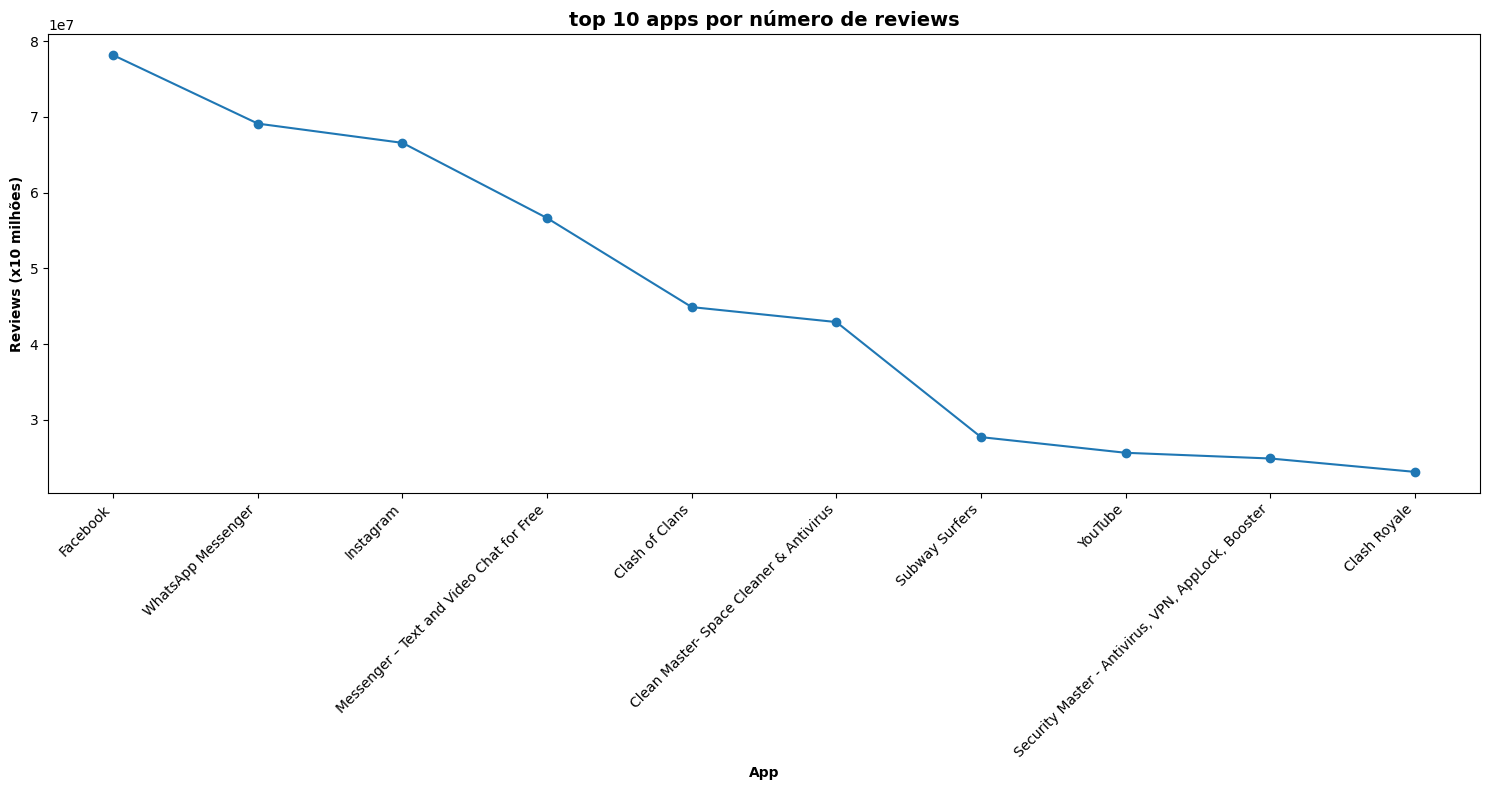

In [264]:
plt.figure(figsize=(15, 8))

plt.plot(top_reviews_apps["App"], top_reviews_apps["Reviews"], marker='o')

plt.title("top 10 apps por número de reviews",fontsize = 14 ,fontweight ="bold")
plt.xlabel("App", fontweight ="bold")
plt.ylabel("Reviews (x10 milhões)", fontweight ="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### 2º Gráfico: gráfico de bolha mostrando os 5 apps por número de instalação


- Criando o gráfico:

<function matplotlib.pyplot.show(close=None, block=None)>

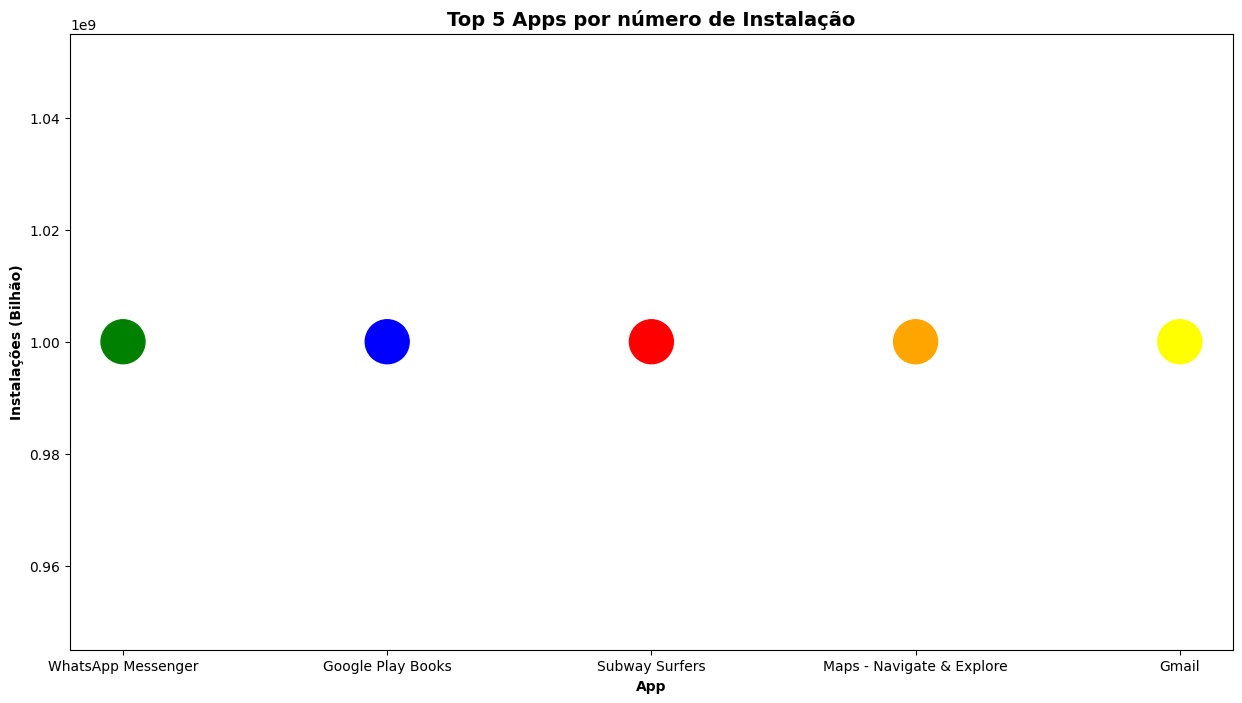

In [285]:
cores = ["green","blue", "red", "orange", "yellow"]

plt.figure(figsize=(15, 8))
plt.scatter(top_Installs["App"], top_Installs["Installs"], s=[i/1000000 for i in top_Installs["Installs"]], c=cores)

plt.title("Top 5 Apps por número de Instalação",fontsize = 14 ,fontweight ="bold")
plt.xlabel("App", fontweight ="bold")
plt.ylabel("Instalações (Bilhão)", fontweight ="bold")

plt.show